# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 36-> Implement CNN with TensorFlow/Keras</p>

# What is Convolutional Neural Networks (CNN)?
Convolutional Neural Networks (CNNs) are a type of deep learning model particularly well-suited for image and video recognition tasks. They work by using convolutional layers to automatically and adaptively learn spatial hierarchies of features from input images. Basic tasks that can be done from scratch with CNNs include image classification, where the model learns to categorize images into predefined classes, and object detection, where the model identifies and locates objects within an image. Other fundamental tasks include image segmentation, which involves partitioning an image into regions of interest, and image denoising, where the model learns to remove noise from images to enhance their quality.

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:

- Convolutional layer
- Pooling layer
- Fully-connected (FC) layer

The convolutional layer is the first layer of a convolutional network. While convolutional layers can be followed by additional convolutional layers or pooling layers, the fully-connected layer is the final layer. With each layer, the CNN increases in its complexity, identifying greater portions of the image. Earlier layers focus on simple features, such as colors and edges. As the image data progresses through the layers of the CNN, it starts to recognize larger elements or shapes of the object until it finally identifies the intended object.

## <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np

## <span style='color:#ff6200'> Load and Process Data</span>

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## <b><span style='color:#ff6200'> Building CNN</span>

This Convolutional Neural Network (CNN) model is designed for image classification tasks. It starts with a sequence of convolutional layers to extract features from images. The first convolutional layer applies 32 filters of size 3x3 to the input image, followed by a ReLU activation function, which helps the model learn non-linear features. This is followed by a max pooling layer that reduces the spatial dimensions of the feature maps, making the computation more efficient and reducing overfitting. A second convolutional layer with 64 filters is applied, followed by another max pooling layer. This process is repeated with a third convolutional layer of 64 filters. After the convolutional layers, the model flattens the 3D feature maps into a 1D vector and passes it through two fully connected (Dense) layers. The first dense layer has 64 units with ReLU activation to introduce non-linearity, while the final dense layer outputs 10 units, which corresponds to the number of classes for classification.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## <span style='color:#ff6200'> Training Model</span>

In [8]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3584 - loss: 1.7481 - val_accuracy: 0.5509 - val_loss: 1.2441
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5830 - loss: 1.1830 - val_accuracy: 0.6010 - val_loss: 1.1160
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6466 - loss: 1.0129 - val_accuracy: 0.6412 - val_loss: 1.0498
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6871 - loss: 0.9041 - val_accuracy: 0.6610 - val_loss: 0.9662
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7080 - loss: 0.8314 - val_accuracy: 0.6765 - val_loss: 0.9496
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7330 - loss: 0.7651 - val_accuracy: 0.7005 - val_loss: 0.8601
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7466 - loss: 0.7148 - val_accuracy: 0.6967 - val_loss: 0.8921
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7629 -

## <span style='color:#ff6200'> Evaluating Model</span>

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 7ms/step - accuracy: 0.7172 - loss: 0.8546
Test accuracy: 0.717199981212616


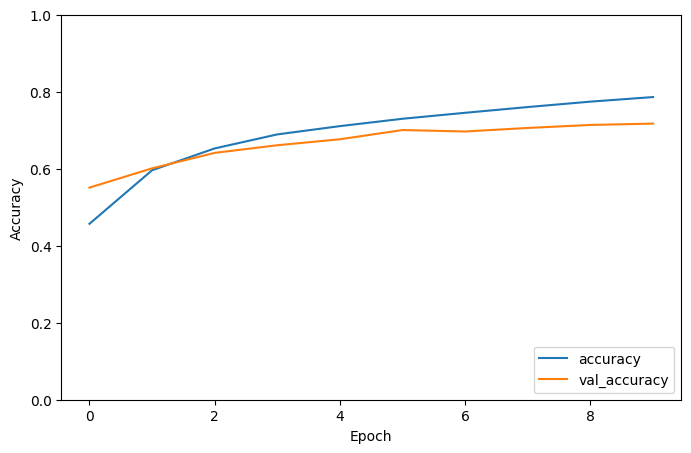

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

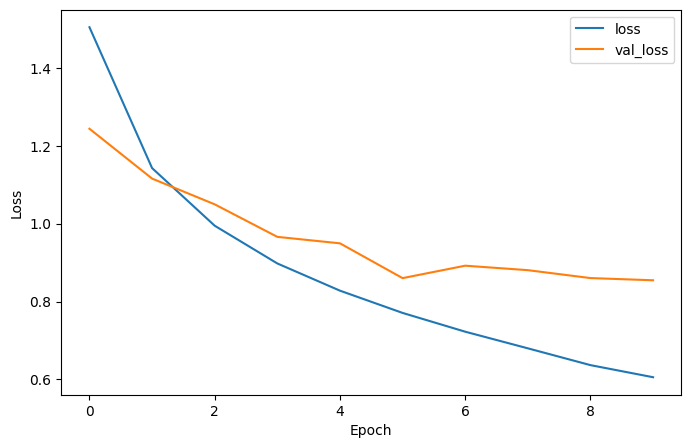

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## <span style='color:#ff6200'> Predictions on Unseen Data</span>

In [12]:
# Make predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [13]:
def display_image_and_prediction(i):
    plt.figure(figsize=(12,5))
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.title(f"Prediction: {classes[np.argmax(predictions[i])]}")
    plt.show()

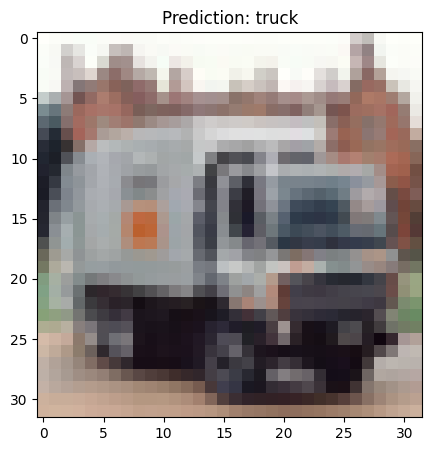

In [14]:
# Display some images and its predicted label
display_image_and_prediction(11)

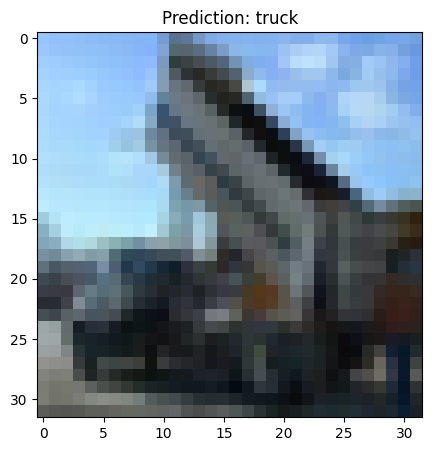

In [15]:
display_image_and_prediction(50)

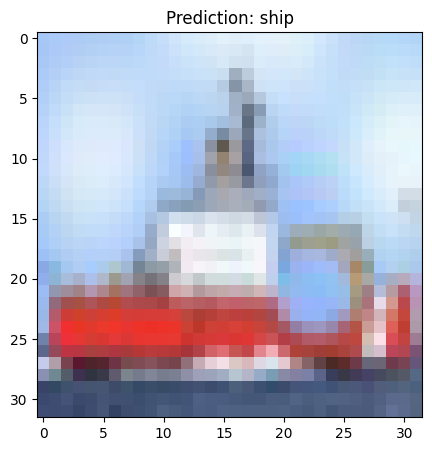

In [16]:
display_image_and_prediction(92)